In [555]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from data_cleaning import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import the data

In [577]:
df = pd.DataFrame.from_csv('data/practice_data.csv', index_col = None)

#### Look at the data. Make sure the index column is correct.

In [557]:
df.head()

,one,two,three,four,five
0,0,'hi',0,'hi',6.67
1,NaN,NaN,6,'tada',?
2,7,'the',9,'hey',78
3,6,'the',10,'tada',NaN


#### Get a list of the column names

In [558]:
col_names = list(df.columns.values)

#### Look at the datatypes in each column.

In [559]:
print_col_datatype(df, col_names)

one : float64
two : object
three : int64
four : object
five : object


#### Enter columns that you expect to have contain numeric values that came up as object to find strange inputs.

In [560]:
non_numeric_value_dict = locate_non_numeric_values(df, 'five')

{1: '?'}


#### Replace the strange values with NaNs

In [561]:
df.five.replace('?', np.nan, inplace=True)

#### Drop any unwanted columns

In [562]:
#df.drop(['col_1_name', 'col_2_name'], axis=1, inplace=True)    

In [563]:
df.head()

,one,two,three,four,five
0,0,'hi',0,'hi',6.67
1,NaN,NaN,6,'tada',NaN
2,7,'the',9,'hey',78
3,6,'the',10,'tada',NaN


#### Change all NaNs to pandas 'None'.

In [564]:
df.replace({'NaN':None, 'nan':None}, inplace=True)

#### Save and print column names for columns that contain NaNs.

In [565]:
nan_columns = find_columns_containing_nan(df, col_names)

Columns containing NaNs:  ['one', 'two', 'five']


#### Decide how to deal with Nans (1 = delete all rows containing NaN, 2 = replace with empty strings, 3 = fill with mean of column, 4 = fill with previous value with limit of 1 value forward, 5 = delete all columns containing NaN, 6 = fill by interpolating). Information for more complex interpolation methods available at: http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [566]:
fill_method = 3
df = replace_missing_values(df, fill_method)

#### Check to make sure all NaNs are removed

In [567]:
nan_columns = find_columns_containing_nan(df, col_names)

Columns containing NaNs:  ['two', 'five']


#### If columns are still in the NaN list and they are numeric, try converting the values to floats, then rerunning replace_missing_values

In [568]:
df = convert_column_to_float(df, 'five')
df = replace_missing_values(df, fill_method)
nan_columns = find_columns_containing_nan(df, col_names)

Columns containing NaNs:  ['two', 'five']


#### Enter columns to make dummy variables for.

In [578]:
columns_to_encode = ['two', 'four']

def make_dummy_variables(df, columns_to_encode):
    df_dummies = pd.get_dummies(df[columns_to_encode])
    df = pd.concat([df, df_dummies], axis=1)
    df.drop(columns_to_encode, axis=1, inplace=True)

In [579]:
make_dummy_variables(df, columns_to_encode)

## Start looking at plots of the data

#### Plot each data column

Cannon plot column two
Cannon plot column four


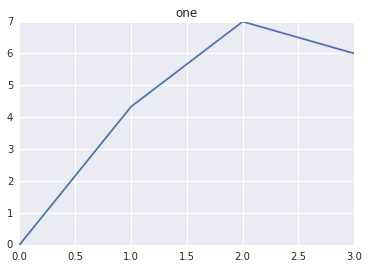

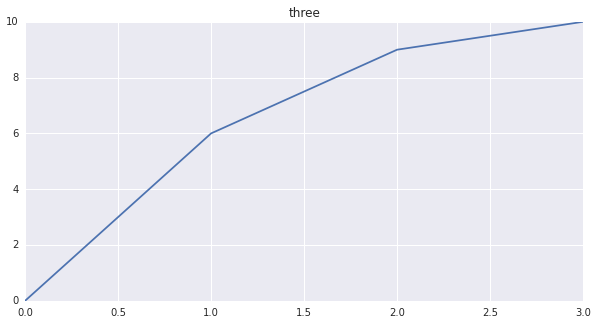

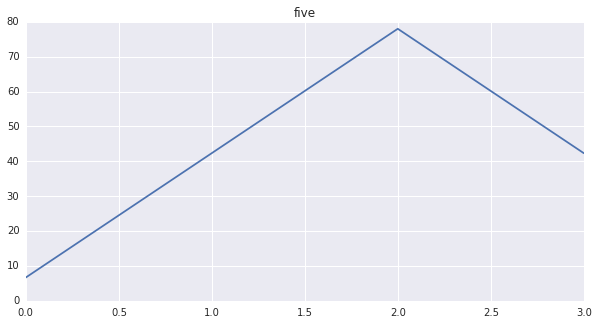

In [539]:
plot_columns(df, col_names)

#### Make histograms of all columns

#### Plot columns against each other

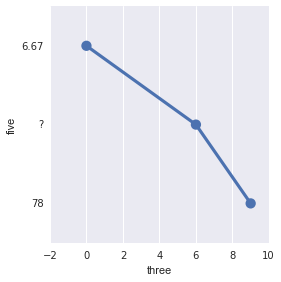

In [582]:
sns.factorplot(data=df, x="three", y="five")

In [584]:
sns.factorplot(data=df, x="three", y="five", col="two")

ValueError: Collections can only map rank 1 arrays